In [32]:
import pandas as pd


In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# ML

In [34]:
pip install matplotlib


In [35]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df_final_clean = pd.read_excel("df_final_clean.xlsx")
df_final_clean_encoded = df_final_clean.copy()

# ‚úÖ 3. ‡πÅ‡∏õ‡∏•‡∏á categorical ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
for col in df_final_clean_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_final_clean_encoded[col] = le.fit_transform(df_final_clean_encoded[col]).astype(int)

df_final_clean_encoded = df_final_clean_encoded.drop(columns=['date'])
df_final_clean_encoded

cases  temp_15d_avg  rain_15d_avg  humid_15d_avg  ‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)  ‡πÄ‡∏û‡∏®  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  \
0         1     22.745000      0.000000      74.794444      34.0    0      0   
1         1     27.170000      2.386667      74.827333      13.0    0     10   
2         1     27.786667      2.520000      73.410667      51.0    1      0   
3         1     27.970000      4.253333      73.302667      14.0    1     10   
4         2     28.501333      4.233333      73.984667      58.0    0      9   
...     ...           ...           ...            ...       ...  ...    ...   
1045      2     22.858571      2.071429      82.036429      20.5    1      6   
1046      2     22.716667      1.933333      81.784000      56.0    0      7   
1047      1     21.687333      1.933333      82.676000      11.0    1     10   
1048      1     21.304667      1.933333      82.992667      41.0    1      7   
1049      1     21.056000      1.933333      82.984667      31.0    1      7   

      ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠  ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô    ‡∏õ‡∏µ  ‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•  
0        8      1      2  2017       1       2  
1       60      8      4  2017       2       1  
2       60      8      5  2017       2       1  
3       60      8      5  2017       2       1  
4       60      8      5  2017       2       1  
...    ...    ...    ...   ...     ...     ...  
1045     3      2     12  2024       4       2  
1046    31      2     12  2024       4       2  
1047    15      2     12  2024       4       2  
1048    35      6     12  2024       4       2  
1049    15      2     12  2024       4       2  

[1050 rows x 13 columns]

In [37]:
df_final_clean_encoded.corr()['cases']

cases            1.000000
temp_15d_avg     0.100030
rain_15d_avg     0.094145
humid_15d_avg    0.018460
‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)        -0.034136
‡πÄ‡∏û‡∏®              0.007874
‡∏≠‡∏≤‡∏ä‡∏µ‡∏û            0.088724
‡∏ï‡∏≥‡∏ö‡∏•             0.051749
‡∏≠‡∏≥‡πÄ‡∏†‡∏≠            0.042857
‡πÄ‡∏î‡∏∑‡∏≠‡∏ô           -0.005328
‡∏õ‡∏µ               0.229528
‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™           0.013666
‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•          -0.147233
Name: cases, dtype: float64

‚úÖ RMSE: 0.39
‚úÖ R¬≤: 0.986


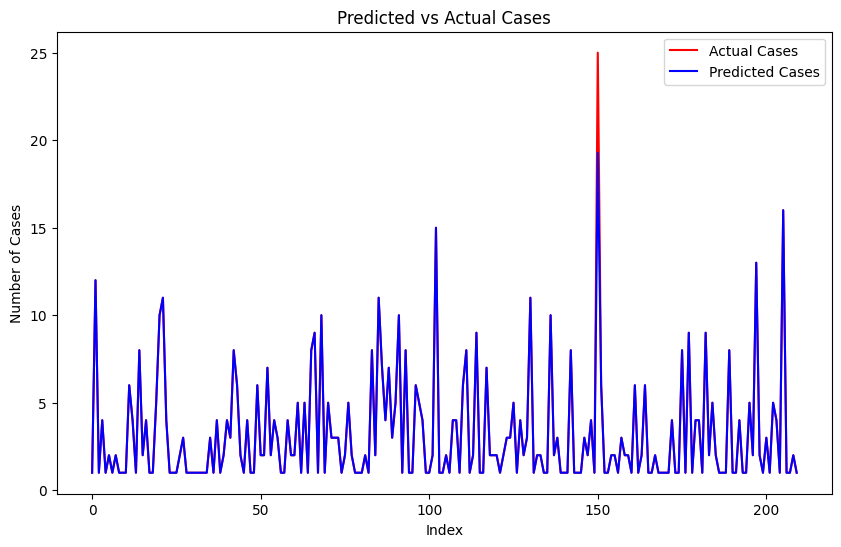

In [38]:

# ‚úÖ 4. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 5. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
gb_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = gb_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"‚úÖ RMSE: {rmse:.2f}")
print(f"‚úÖ R¬≤: {r2:.3f}")

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases', color='blue')
plt.title('Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


‚úÖ XGBoost RMSE: 0.08
‚úÖ XGBoost R¬≤: 0.999
‚úÖ XGBoost MAE: 0.01


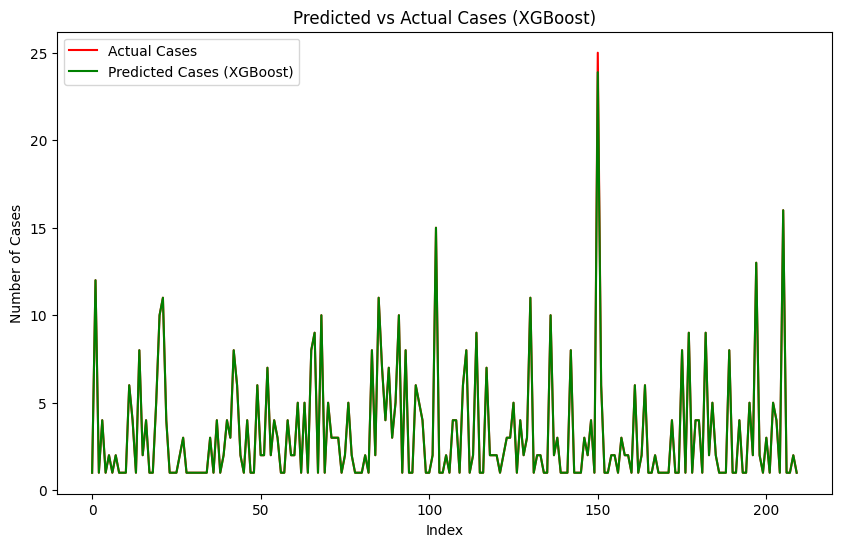

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# ‚úÖ 4. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 5. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
xgb_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = xgb_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì MAE

print(f"‚úÖ XGBoost RMSE: {rmse:.2f}")
print(f"‚úÖ XGBoost R¬≤: {r2:.3f}")
print(f"‚úÖ XGBoost MAE: {mae:.2f}")  # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• MAE

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


        Month  Actual  Predicted
0     2017-02       1   1.000094
1     2017-04       1   1.000094
14    2017-05       1   1.000094
13    2017-05       1   1.000094
12    2017-05       1   1.000094
...       ...     ...        ...
1037  2024-12      12  11.999688
1036  2024-12       7   6.999883
1035  2024-12       1   1.000094
1041  2024-12       1   1.000094
1049  2024-12       1   1.000094

[1050 rows x 3 columns]
‚úÖ Saved result to predicted_vs_actual_all_data.csv


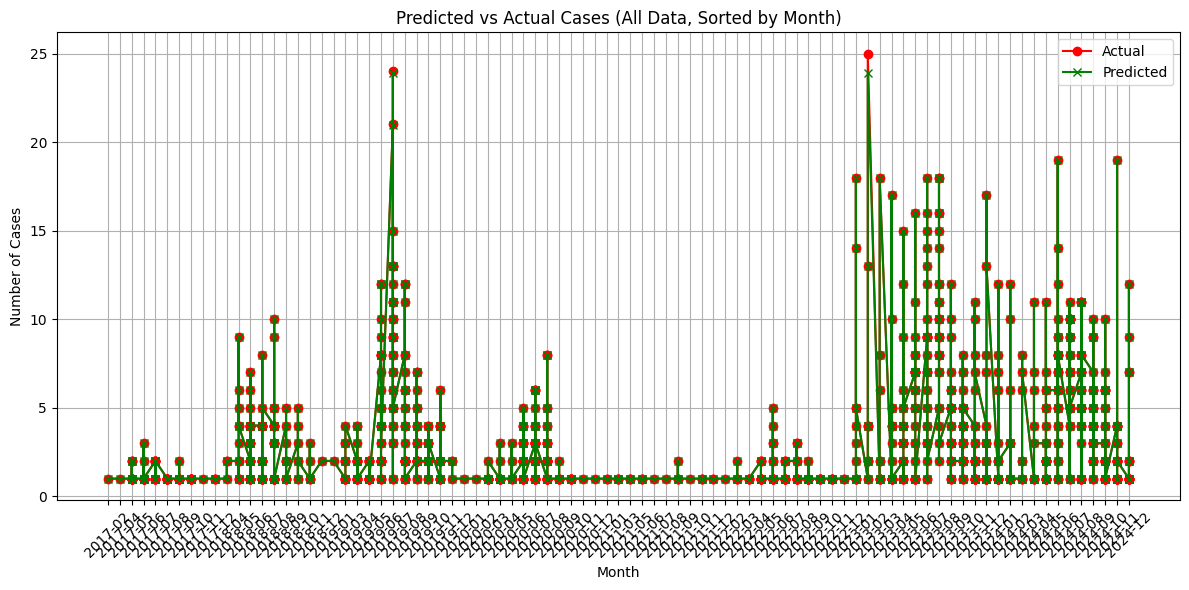

In [55]:
# ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ó‡∏±‡πâ‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• X (‡∏ó‡∏±‡πâ‡∏á train + test)
y_pred_full = xgb_model.predict(X)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á vs ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ (‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î)
df_result_full = pd.DataFrame({
    'Month': df_final_clean['Month_Full'],  # ‡πÉ‡∏ä‡πâ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Month_Full ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏µ-‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
    'Actual': y.values,
    'Predicted': y_pred_full
})

# ‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏° Month (‡∏õ‡∏µ-‡πÄ‡∏î‡∏∑‡∏≠‡∏ô)
df_result_full_sorted = df_result_full.sort_values(by='Month')

# ‡πÅ‡∏™‡∏î‡∏á‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
print(df_result_full_sorted)

# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏•‡∏á‡πÑ‡∏ü‡∏•‡πå CSV
df_result_full_sorted.to_csv('predicted_vs_actual_all_data.csv', index=False)
print("‚úÖ Saved result to predicted_vs_actual_all_data.csv")

# ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö (‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ó‡∏±‡πâ‡∏á‡∏ä‡∏∏‡∏î)
plt.figure(figsize=(12,6))
plt.plot(df_result_full_sorted['Month'], df_result_full_sorted['Actual'], label='Actual', marker='o', color='red')
plt.plot(df_result_full_sorted['Month'], df_result_full_sorted['Predicted'], label='Predicted', marker='x', color='green')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Predicted vs Actual Cases (All Data, Sorted by Month)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
X

temp_15d_avg  rain_15d_avg  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠  ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô    ‡∏õ‡∏µ  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•
0        22.745000      0.000000      0     8      1      2  2017       2
1        27.170000      2.386667     10    60      8      4  2017       1
2        27.786667      2.520000      0    60      8      5  2017       1
3        27.970000      4.253333     10    60      8      5  2017       1
4        28.501333      4.233333      9    60      8      5  2017       1
...            ...           ...    ...   ...    ...    ...   ...     ...
1045     22.858571      2.071429      6     3      2     12  2024       2
1046     22.716667      1.933333      7    31      2     12  2024       2
1047     21.687333      1.933333     10    15      2     12  2024       2
1048     21.304667      1.933333      7    35      6     12  2024       2
1049     21.056000      1.933333      7    15      2     12  2024       2

[1050 rows x 8 columns]

In [56]:
import joblib
joblib.dump(xgb_model, "xgb_regressor.pkl")
print("‚úÖ Saved new model: xgb_regressor.pkl")


‚úÖ Saved new model: xgb_regressor.pkl


üîé Overfitting Check
Train RMSE: 0.00
Train R¬≤: 1.000
Test  RMSE: 0.08
Test  R¬≤: 0.999


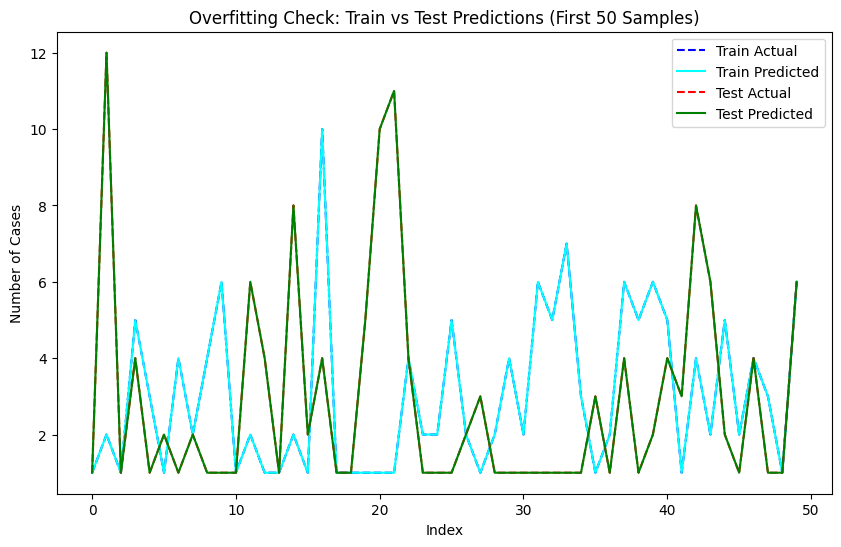

In [21]:
# ‚úÖ ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• Train set
y_train_pred = xgb_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("üîé Overfitting Check")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R¬≤: {r2_train:.3f}")
print(f"Test  RMSE: {rmse:.2f}")
print(f"Test  R¬≤: {r2:.3f}")

# ‚úÖ ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö Train vs Test
plt.figure(figsize=(10,6))
plt.plot(y_train.values[:50], label='Train Actual', color='blue', linestyle='--')
plt.plot(y_train_pred[:50], label='Train Predicted', color='cyan')
plt.plot(y_test.values[:50], label='Test Actual', color='red', linestyle='--')
plt.plot(y_pred[:50], label='Test Predicted', color='green')
plt.title('Overfitting Check: Train vs Test Predictions (First 50 Samples)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


‚úÖ XGBoost RMSE: 2.67
‚úÖ XGBoost R¬≤: 0.352
‚úÖ XGBoost MAE: 1.82
üìä Cross-validated R¬≤ (mean): -0.633
üìä Cross-validated R¬≤ (std): 1.147


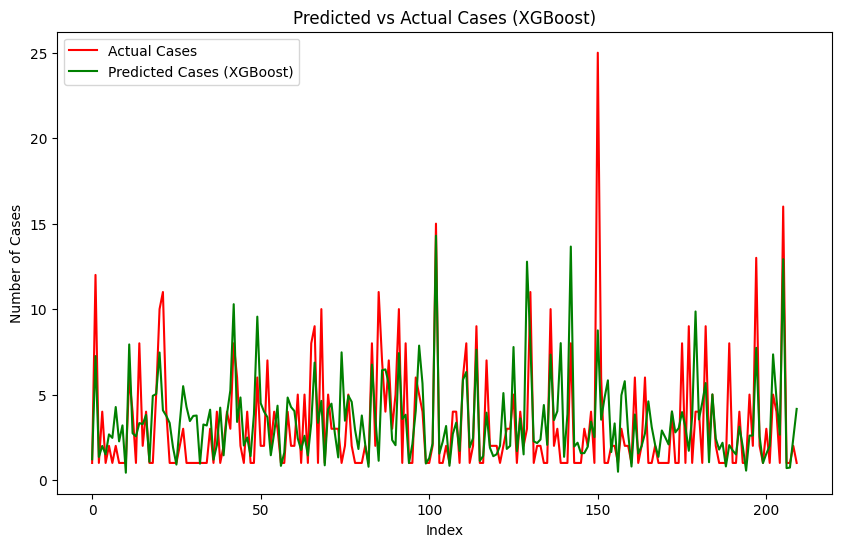

üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

# ‚úÖ 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y (‡∏ï‡∏±‡∏î‡πÅ‡∏Ñ‡πà target 'cases')
X = df_final_clean_encoded.drop(columns=['cases','‡πÄ‡∏û‡∏®','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 2. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ‚úÖ 3. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ‚úÖ 4. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = xgb_model.predict(X_test)

# ‚úÖ 5. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"‚úÖ XGBoost RMSE: {rmse:.2f}")
print(f"‚úÖ XGBoost R¬≤: {r2:.3f}")
print(f"‚úÖ XGBoost MAE: {mae:.2f}")

# ‚úÖ 6. Cross-validation
cv_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"üìä Cross-validated R¬≤ (mean): {cv_r2_scores.mean():.3f}")
print(f"üìä Cross-validated R¬≤ (std): {cv_r2_scores.std():.3f}")

# ‚úÖ 7. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á vs ‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ‚úÖ 8. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• + ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(X.columns.tolist(), "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")


‚úÖ XGBoost RMSE: 2.51
‚úÖ XGBoost R¬≤: 0.408
‚úÖ XGBoost MAE: 1.75
üìä Cross-validated R¬≤ (mean): -0.101
üìä Cross-validated R¬≤ (std): 0.514


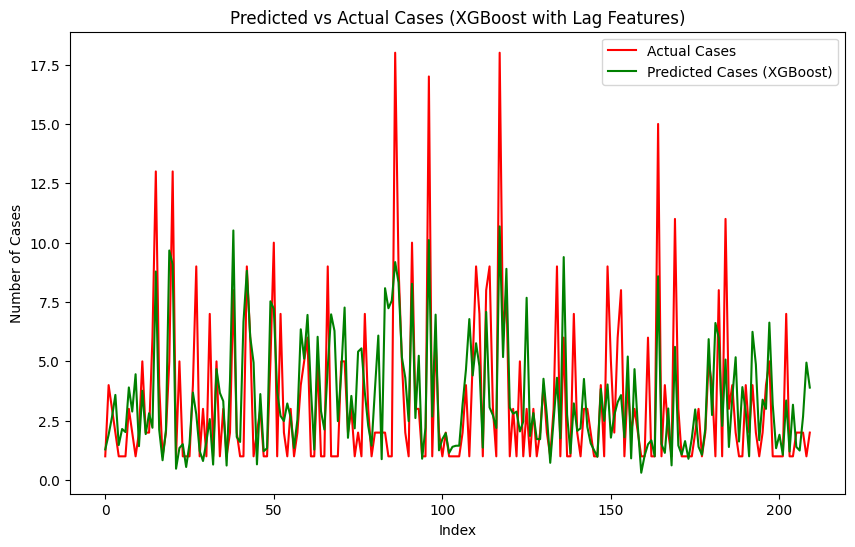

üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import joblib

# ‚úÖ 1. ‡πÄ‡∏û‡∏¥‡πà‡∏° lag features (1, 2, 3 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á)
df_with_lag = df_final_clean_encoded.copy()
df_with_lag['cases_lag1'] = df_final_clean['cases'].shift(1)
df_with_lag['cases_lag2'] = df_final_clean['cases'].shift(2)
df_with_lag['cases_lag3'] = df_final_clean['cases'].shift(3)

# ‡∏•‡∏ö‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ NaN ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å shift
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

# ‚úÖ 2. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y (‡∏ï‡∏±‡∏î target ‡∏≠‡∏≠‡∏Å + ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô)
X = df_with_lag.drop(columns=['cases','‡πÄ‡∏û‡∏®','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_with_lag['cases']

# ‚úÖ 3. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ‚úÖ 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
xgb_model = XGBRegressor(
    n_estimators=600,          # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏£‡∏≠‡∏ö
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ‚úÖ 5. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = xgb_model.predict(X_test)

# ‚úÖ 6. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"‚úÖ XGBoost RMSE: {rmse:.2f}")
print(f"‚úÖ XGBoost R¬≤: {r2:.3f}")
print(f"‚úÖ XGBoost MAE: {mae:.2f}")

# ‚úÖ 7. Cross-validation
cv_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"üìä Cross-validated R¬≤ (mean): {cv_r2_scores.mean():.3f}")
print(f"üìä Cross-validated R¬≤ (std): {cv_r2_scores.std():.3f}")

# ‚úÖ 8. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á vs ‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost with Lag Features)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ‚úÖ 9. ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• + ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(X.columns.tolist(), "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }

# ‚úÖ RandomForest
rf_model = RandomForestRegressor(
    n_estimators=300, max_depth=8, random_state=42
)
rf_result = evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)

# ‚úÖ Deep Learning (MLP)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32), max_iter=500, random_state=42
)
mlp_result = evaluate_model("MLP Neural Network", mlp_model, X_train, X_test, y_train, y_test)

# ‚úÖ ‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á
import pandas as pd
results_df = pd.DataFrame([{
    "Model": "XGBoost",
    "RMSE": rmse,
    "R2": r2,
    "MAE": mae
}, rf_result, mlp_result])

print("\nüìä Performance Comparison:")
print(results_df)


üîπ RandomForest RMSE: 3.14, R¬≤: 0.154, MAE: 2.37
üîπ MLP Neural Network RMSE: 3.25, R¬≤: 0.093, MAE: 2.56

üìä Performance Comparison:
                Model      RMSE        R2       MAE
0             XGBoost  3.151513  0.148102  2.349402
1        RandomForest  3.139775  0.154436  2.370653
2  MLP Neural Network  3.251142  0.093388  2.560092


In [57]:
X

cases  temp_15d_avg  rain_15d_avg  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠  ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô    ‡∏õ‡∏µ  \
0         1     22.745000      0.000000      0     8      1      2  2017   
1         1     27.170000      2.386667     10    60      8      4  2017   
2         1     27.786667      2.520000      0    60      8      5  2017   
3         1     27.970000      4.253333     10    60      8      5  2017   
4         2     28.501333      4.233333      9    60      8      5  2017   
...     ...           ...           ...    ...   ...    ...    ...   ...   
1045      2     22.858571      2.071429      6     3      2     12  2024   
1046      2     22.716667      1.933333      7    31      2     12  2024   
1047      1     21.687333      1.933333     10    15      2     12  2024   
1048      1     21.304667      1.933333      7    35      6     12  2024   
1049      1     21.056000      1.933333      7    15      2     12  2024   

      ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•  
0          2  
1          1  
2          1  
3          1  
4          1  
...      ...  
1045       2  
1046       2  
1047       2  
1048       2  
1049       2  

[1050 rows x 9 columns]

‚úÖ Random Forest RMSE: 0.39
‚úÖ Random Forest R¬≤: 0.986


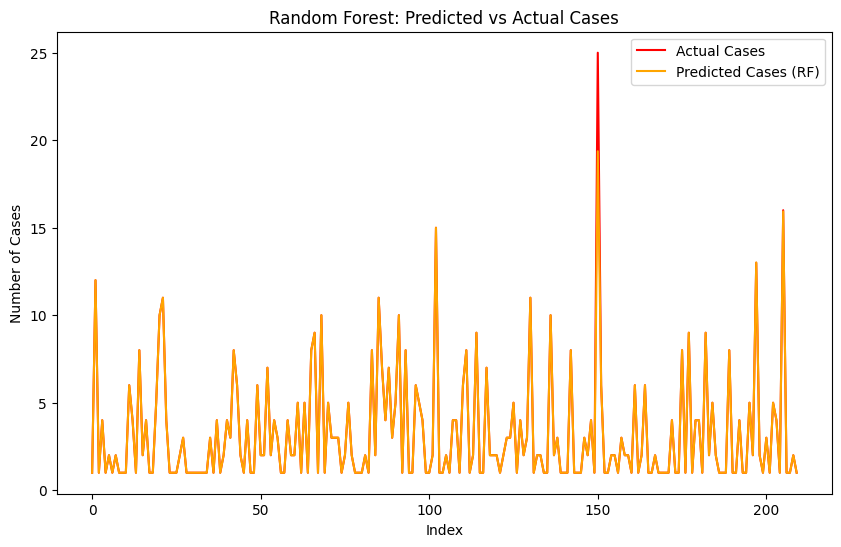

In [23]:
from sklearn.ensemble import RandomForestRegressor
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
rf_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = rf_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"‚úÖ Random Forest RMSE: {rmse:.2f}")
print(f"‚úÖ Random Forest R¬≤: {r2:.3f}")

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (RF)', color='orange')
plt.title('Random Forest: Predicted vs Actual Cases')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


üìä Comparison of Models (RMSE & MAE):
               Model  RMSE   MAE
0  Gradient Boosting  0.39  0.03
1            XGBoost  0.08  0.01
2      Random Forest  0.39  0.03
3      Deep Learning  0.13  0.10


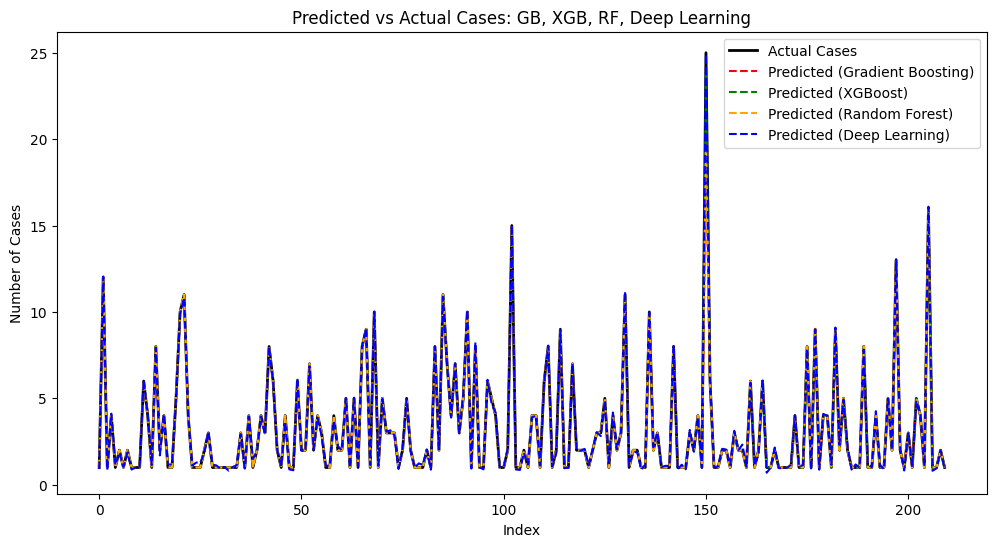

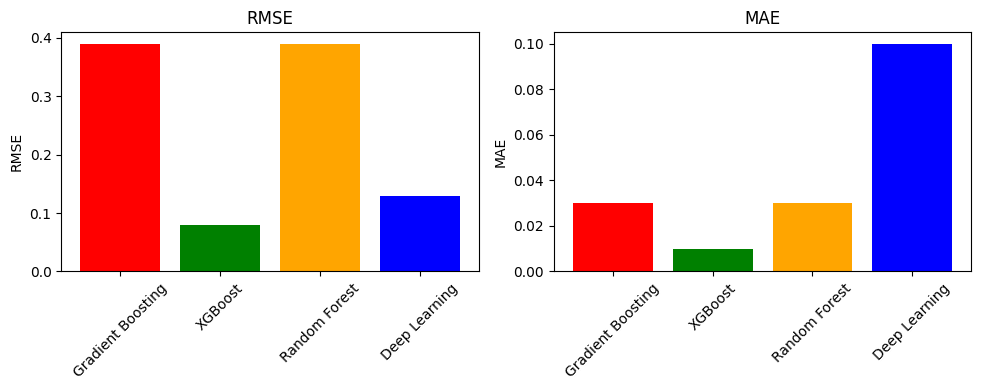

In [24]:
# ==========================
# 0. Import Libraries
# ==========================
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================
# 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
# ==========================
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ==========================
# 2. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 3. Standardize ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Deep Learning
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Gradient Boosting
# ==========================
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ==========================
# 5. ‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
# ==========================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ==========================
# 6. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Random Forest
# ==========================
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ==========================
# 7. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Deep Learning (MLP)
# ==========================
dl_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                        max_iter=500, random_state=42)
dl_model.fit(X_train_scaled, y_train)
y_pred_dl = dl_model.predict(X_test_scaled)

# ==========================
# 8. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• RMSE & MAE
# ==========================
models = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Deep Learning']
preds = [y_pred_gb, y_pred_xgb, y_pred_rf, y_pred_dl]

metrics = []
for name, y_pred in zip(models, preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append({'Model': name, 'RMSE': round(rmse,2), 'MAE': round(mae,2)})

metrics_df = pd.DataFrame(metrics)
print("üìä Comparison of Models (RMSE & MAE):")
print(metrics_df)

# ==========================
# 9. ‡∏Å‡∏£‡∏≤‡∏ü Actual vs Predicted
# ==========================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Cases', color='black', linewidth=2)
plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)', color='red', linestyle='--')
plt.plot(y_pred_xgb, label='Predicted (XGBoost)', color='green', linestyle='--')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='orange', linestyle='--')
plt.plot(y_pred_dl, label='Predicted (Deep Learning)', color='blue', linestyle='--')
plt.title('Predicted vs Actual Cases: GB, XGB, RF, Deep Learning')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ==========================
# 10. Bar chart RMSE & MAE
# ==========================
plt.figure(figsize=(10,4))
metrics_list = ['RMSE','MAE']
colors = ['red','green','orange','blue']

for i, metric in enumerate(metrics_list):
    plt.subplot(1,2,i+1)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=colors)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
import joblib

model = joblib.load('xgb_model.pkl')
print(model.feature_names_in_)


['cases' 'temp_15d_avg' 'rain_15d_avg' '‡∏≠‡∏≤‡∏ä‡∏µ‡∏û' '‡∏ï‡∏≥‡∏ö‡∏•' '‡∏≠‡∏≥‡πÄ‡∏†‡∏≠' '‡∏õ‡∏µ'
 '‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•']
